In [1]:
import pandas as pd
from matplotlib import dates as mpl_date
import matplotlib.pyplot as plt

In [2]:
dataCPU = pd.read_csv("CPU.csv")
dataCPU.drop(columns=dataCPU.columns[0], axis=1, inplace=True)
dataCPU.head()

,Time,Time_Elapsed,CPU_Precentage
0,14:15:34,0.104371,3.6
1,14:15:35,0.908265,18.7
2,14:15:35,1.108785,17.3
3,14:15:35,1.309632,16.0
4,14:15:35,1.510862,6.3


In [3]:
dataCPU.describe()

,Time_Elapsed,CPU_Precentage
count,143.000000,143.000000
mean,15.406429,17.124476
std,8.608283,13.490613
min,0.104371,1.200000
25%,8.055382,9.900000
50%,15.409714,13.600000
75%,22.758787,21.150000
max,30.107003,83.800000


In [4]:
dataCPU = dataCPU[:100]
dataCPU.describe()

,Time_Elapsed,CPU_Precentage
count,100.000000,100.000000
mean,10.933133,15.839000
std,6.012555,14.319316
min,0.104371,1.200000
25%,5.689433,8.800000
50%,11.078174,11.350000
75%,16.065464,18.050000
max,21.048228,83.800000


In [5]:
dfH = []
dfm = []
dfs = []
for index, row in dataCPU.iterrows():
    timestamp = row['Time']
    H,m,s = timestamp.split(':')
    dfH.append(H)
    dfm.append(m)
    dfs.append(s)

dataCPU['H'] = dfH
dataCPU['m'] = dfm
dataCPU['s'] = dfs

print(type(dataCPU))
dataCPU.head()

<class 'pandas.core.frame.DataFrame'>


,Time,Time_Elapsed,CPU_Precentage,H,m,s
0,14:15:34,0.104371,3.6,14,15,34
1,14:15:35,0.908265,18.7,14,15,35
2,14:15:35,1.108785,17.3,14,15,35
3,14:15:35,1.309632,16.0,14,15,35
4,14:15:35,1.510862,6.3,14,15,35


In [6]:
groupData = dataCPU.groupby(['H', 'm', 's'], as_index=False).mean()
groupData

,H,m,s,Time_Elapsed,CPU_Precentage
0,14,15,34,0.104371,3.600000
1,14,15,35,1.209386,14.575000
2,14,15,36,2.114677,12.840000
3,14,15,37,3.121132,15.580000
4,14,15,38,4.128148,23.900000
5,14,15,39,5.135421,17.540000
6,14,15,40,6.142965,8.540000
7,14,15,41,7.249938,6.200000
8,14,15,42,8.156177,7.720000
9,14,15,43,9.263295,22.225000


In [7]:
Time = []
for index, row in groupData.iterrows():
    Time.append(row['H']+':'+row['m']+':'+row['s'])

newDF = pd.DataFrame()
newDF['Time'] = Time
newDF['CPU_Precentage'] = groupData['CPU_Precentage']
newDF['Time'] = pd.to_datetime(newDF['Time'])
newDF
    

,Time,CPU_Precentage
0,2022-11-13 14:15:34,3.600000
1,2022-11-13 14:15:35,14.575000
2,2022-11-13 14:15:36,12.840000
3,2022-11-13 14:15:37,15.580000
4,2022-11-13 14:15:38,23.900000
5,2022-11-13 14:15:39,17.540000
6,2022-11-13 14:15:40,8.540000
7,2022-11-13 14:15:41,6.200000
8,2022-11-13 14:15:42,7.720000
9,2022-11-13 14:15:43,22.225000


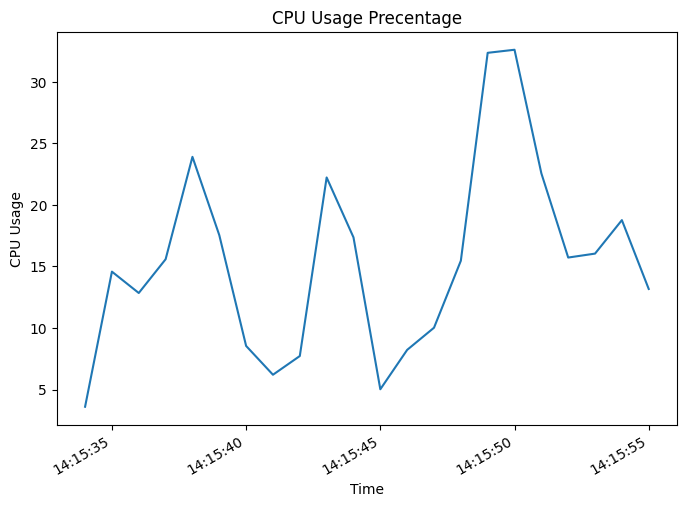

In [13]:
plt.plot(newDF.Time, newDF.CPU_Precentage)
 
plt.title('CPU Usage Precentage')
plt.xticks(rotation=30, ha='right')

plt.xlabel('Time')
plt.ylabel('CPU Precentage')
plt.savefig('CPU.png')